# Periodic features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a dataframe with the hour from 0 to 23.

df = pd.DataFrame([i for i in range(24)], columns=["hour"])

df.head()

,hour
0,0
1,1
2,2
3,3
4,4


In [3]:
# We transform the feature with the sine and cosine function.

df["hour_sin"] = np.sin(df["hour"] / df["hour"].max() * 2 * np.pi)

df["hour_cos"] = np.cos(df["hour"] / df["hour"].max() * 2 * np.pi)

df.head()

,hour,hour_sin,hour_cos
0,0,0.000000,1.000000
1,1,0.269797,0.962917
2,2,0.519584,0.854419
3,3,0.730836,0.682553
4,4,0.887885,0.460065


Text(0.5, 1.0, 'Sine transformation')

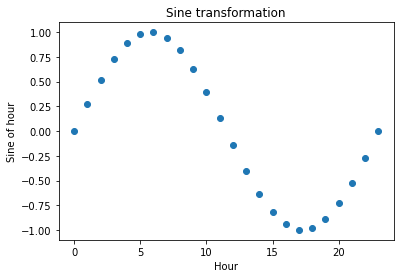

In [4]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_sin"])

# Axis labels
plt.ylabel("Sine of hour")
plt.xlabel("Hour")
plt.title("Sine transformation")

Text(0.5, 1.0, 'Cosine transformation')

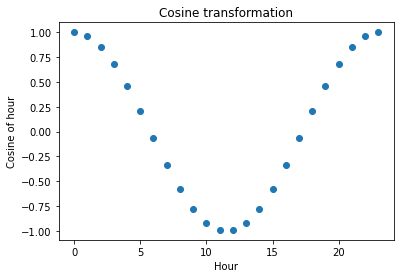

In [5]:
# Plot hour vs its trigonometric transformation.

plt.scatter(df["hour"], df["hour_cos"])

# Axis labels
plt.ylabel("Cosine of hour")
plt.xlabel("Hour")
plt.title("Cosine transformation")

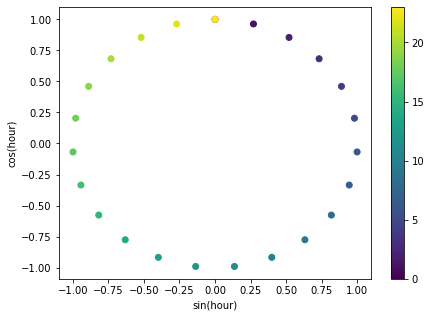

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)",
)
_ = fig.colorbar(sp)

Now, let's automate feature creation from multiple variables.

In [7]:
from feature_engine.creation import CyclicalFeatures

In [8]:
# let's create the dataframe with 3 cyclical variables

df = pd.DataFrame()
df["hour"] = pd.Series([i for i in range(24)])
df["month"] = pd.Series([i for i in range(1, 13)] * 2)
df["week"] = pd.Series([i for i in range(7)] * 4)

df.head()

,hour,month,week
0,0,1,0
1,1,2,1
2,2,3,2
3,3,4,3
4,4,5,4


In [9]:
df.max()

hour     23
month    12
week      6
dtype: int64

In [10]:
cyclic = CyclicalFeatures(
    variables=None,
    drop_original=False,
)

dft = cyclic.fit_transform(df)

dft.head()

,hour,month,week,hour_sin,hour_cos,month_sin,month_cos,week_sin,week_cos
0,0,1,0,0.000000,1.000000,0.500000,8.660254e-01,0.000000e+00,1.0
1,1,2,1,0.269797,0.962917,0.866025,5.000000e-01,8.660254e-01,0.5
2,2,3,2,0.519584,0.854419,1.000000,6.123234e-17,8.660254e-01,-0.5
3,3,4,3,0.730836,0.682553,0.866025,-5.000000e-01,1.224647e-16,-1.0
4,4,5,4,0.887885,0.460065,0.500000,-8.660254e-01,-8.660254e-01,-0.5
